<h1 align="center">CS550: Machine Learning</h1>
<h2 align="center">Assignment 1: Question 2</h2>
<h3>Submitted by:-</h3>
<h6>NEELMANI GAUTAM - 11640590</h6>

# Telco Customer Churn

# Table of Content

1. [Import Modules, Define Constants and Initialize Notebook](#1)<br><br>
2. [Import and Clean Data](#2)<br><br>
3. [Exploratory Data Analysis](#3)<br>
    3.1 [Descriptive Analysis](#3.1)<br>
    3.2 [Graphical Analysis](#3.2)<br>
      &emsp;3.2.1 [Numeric Data Analysis](#3.2.1)<br>
      &emsp;3.2.2 [Numeric vs Categorical Data Analysis](#3.2.2)<br>
      &emsp;3.2.3 [Categorical Data Analysis](#3.2.3)<br><br>
4. [Machine Learning](#4)<br>
    4.1 [Preprocessing Data](#4.1)<br>
    4.2 [Divide Dataset into Training, Cross-Validation and Testing Data*](#4.2)<br>
      &emsp;4.2.1 [Holdout Method with Random Sampling*](#4.2.1)<br>
      &emsp;4.2.2 [Stratified Holdout Method*](#4.2.2)<br>
      &emsp;4.2.3 [Stratified K-Folds Cross-Validation*](#4.2.3)<br>
      &emsp;4.2.4 [Bootstrapping*](#4.2.4)<br>
    4.3 [Model Selection using Stratified K-Fold Cross-Validation](#4.3)<br>
    4.4 [Feature Selection](#4.4)<br>
      &emsp;4.4.1 [Ranking Features on the basis of Model Coefficients](#4.4.1)<br>
      &emsp;4.4.2 [Recursive Feature Elimination (RFE) using Stratified K-Fold Cross-Validation](#4.4.2)<br>
    4.5 [Hyperparameter Tuning using Grid Search](#4.5)<br><br>
5. [Final Model](#5)<br>

#### Note: We are using  Area under ROC Curve(AUROC Score) as a measure of goodness of model. AUROC score gives the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative. Since we care more about those customer who have high chances of leaving (i.e. "Churn==1") and thus we want our model to predict it correctly so we are using ROC Curve

## 1. Import Modules, Define Constants and Initialize Notebook
<a id="1"></a>

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import RFECV

%matplotlib inline
np.random.seed(42)

# Constants:
RANDOM_SEED = 42
TEST_RATIO = 0.2
VAL_RATIO = 0.2
CV_FOLDS = 10

/home/nmg/PyEnvs/ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Import and Clean Data
<a id="2"></a>

In [3]:
# Read the file:
file = "./WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataset = pd.read_csv(file, na_values=[" "])

In [4]:
# Looking into dataset:
dataset.info()

display(dataset.head().T) #Transposed for easier visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Deleting the "custumerID" feature column as it is useless:
del dataset["customerID"]

In [6]:
# Number of nulls in each feature column of dataset:
display(dataset.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Remove all the sample rows containing null:
dataset = dataset.dropna()

In [8]:
# Change "SeniorCitizen" feature column data from 0/1 to Yes/No :
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].transform(lambda x:'Yes' if x==1 else 'No')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


## 3. Exploratory Data Analysis
<a id="3"></a>

### 3.1 Discriptive Analysis
<a id="3.1"></a>

In [9]:
# Split the dataset into numeric and categorical to facilitate the analysis:
numData = dataset.select_dtypes(include=['float64', 'int64'])
catData = dataset.select_dtypes(exclude=['float64', 'int64'])

#### 3.1.1 Numeric Data
<a id="3.1.1"></a>

In [10]:
display(numData.describe())

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#### 3.1.1 Categorical Data
<a id="3.1.1"></a>

In [11]:
display(catData.describe().T)

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


- The probability of churn for each attribute value, for example, if the gender is female what is the chance of churn? I'm only showing the chance of churn==1 since the chance of churn==0 will be the complementary(1-p).

In [12]:
print('Probability of Churn=="Yes" for each categoriacl attribute value:-')
for cat in catData.columns[:-1]:
    print('\n\t{}:-'.format(cat))
    for category in catData[cat].unique():
        print('\t\t{}: {}'.format(category, np.sum(catData.Churn[catData[cat] == category] ==
                                                   'Yes')/np.sum(catData[cat] == category)))

Probability of Churn=="Yes" for each categoriacl attribute value:-

	gender:-
		Female: 0.2695951765719208
		Male: 0.26204564666103125

	SeniorCitizen:-
		No: 0.2365025466893039
		Yes: 0.4168126094570928

	Partner:-
		Yes: 0.1971706454465075
		No: 0.3297609233305853

	Dependents:-
		No: 0.3127914048246503
		Yes: 0.15531205335874226

	PhoneService:-
		No: 0.25
		Yes: 0.26747481108312343

	MultipleLines:-
		No phone service: 0.25
		No: 0.25081240768094537
		Yes: 0.28648466464442196

	InternetService:-
		DSL: 0.18998344370860928
		Fiber optic: 0.4189276485788114
		No: 0.07434210526315789

	OnlineSecurity:-
		No: 0.4177866742922505
		Yes: 0.14640198511166252
		No internet service: 0.07434210526315789

	OnlineBackup:-
		Yes: 0.2156701030927835
		No: 0.39941690962099125
		No internet service: 0.07434210526315789

	DeviceProtection:-
		No: 0.3914027149321267
		Yes: 0.22539288668320925
		No internet service: 0.07434210526315789

	TechSupport:-
		No: 0.41647465437788017
		Yes: 0.151960784313725

### 3.2 Graphical Analysis
<a id="3.2"></a>

#### 3.2.1 Numeric Data Analysis
<a id="3.2.1"></a>

- In this part we will look into our numerical variables, how they are distributed, how they relate with each other and how they can help us to predict the ‘Churn’ variable.

[]

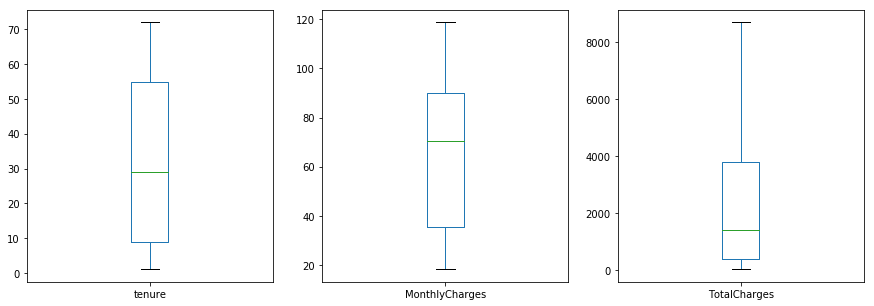

In [13]:
# Box plots:
numData.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()

- From above we observe that there are no outliers in numeric data

[]

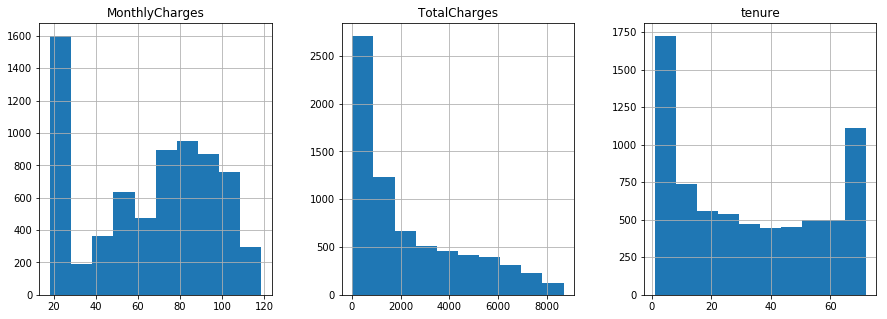

In [14]:
# Histogram plots:
numData.hist(layout=(1,3), figsize=(15,5))
plt.plot()

- The box plot and histogram shows us that our numerical variables are not normally distributed. I will check how they relate to the variable we are trying to predict.

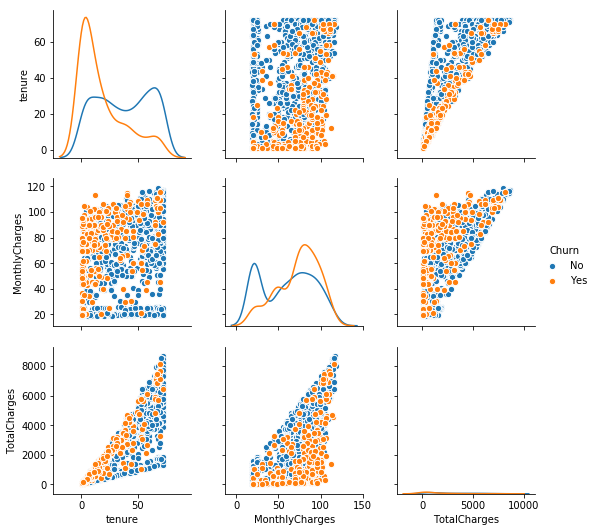

In [15]:
# Add target feature "Churn" to numeric data:
numData = pd.concat([numData,dataset["Churn"]],axis=1)

#Scatter plot on off-diagonal axes and KDE plot on diagonal:
numGrd = sns.PairGrid(numData.sample(n=1000), hue="Churn")
numGrd = numGrd.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
numGrd = numGrd.map_diag(sns.kdeplot)
numGrd = numGrd.add_legend()

#Remove target feature "Churn" from numeric data:
numData.drop("Churn", axis=1, inplace=True)

#### 3.2.2 Numeric vs Categorical Data Analysis
<a id="3.2.2"></a>

- I will use Violine Plot to analyse the numerical variables compared to the categorical variables. Since there are too many variables to plot I will plot in 3 steps.

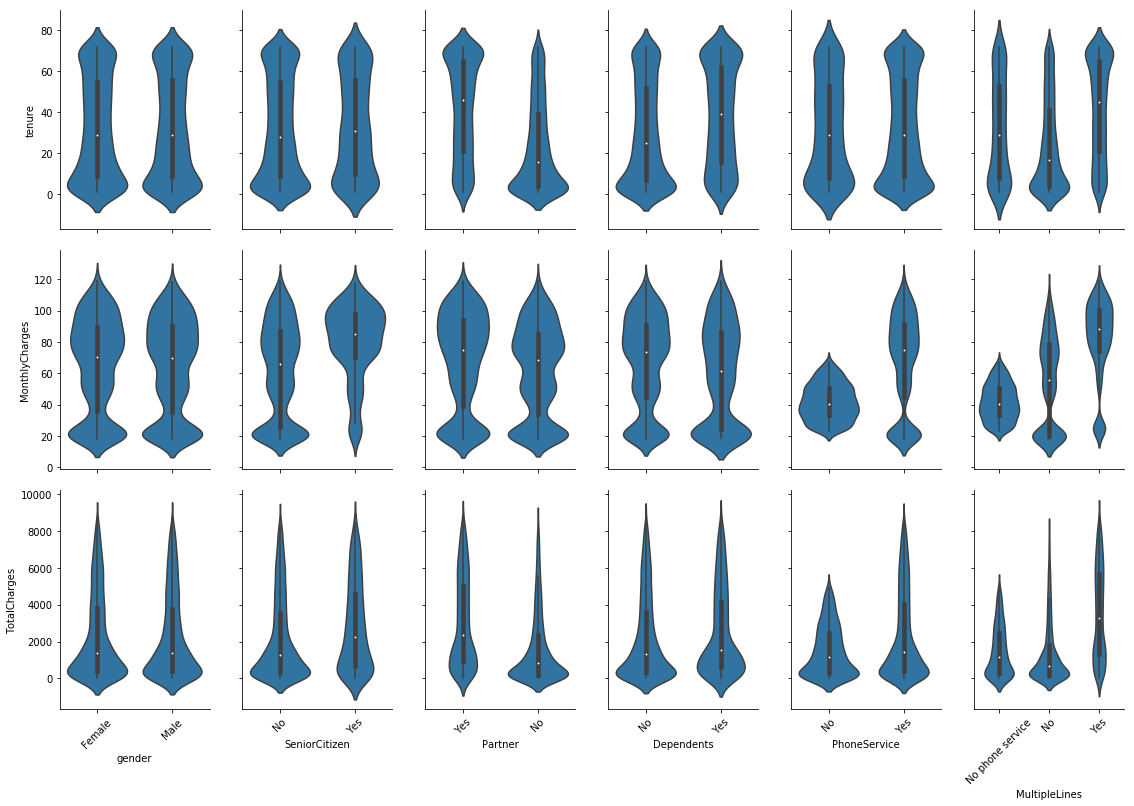

In [16]:
numCatGrd = sns.PairGrid(dataset, x_vars=catData.columns[0:6].values,
                         y_vars=numData.columns[0:3].values, aspect=.75, height=3.5)
for ax in numCatGrd.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
numCatGrd.map(sns.violinplot)

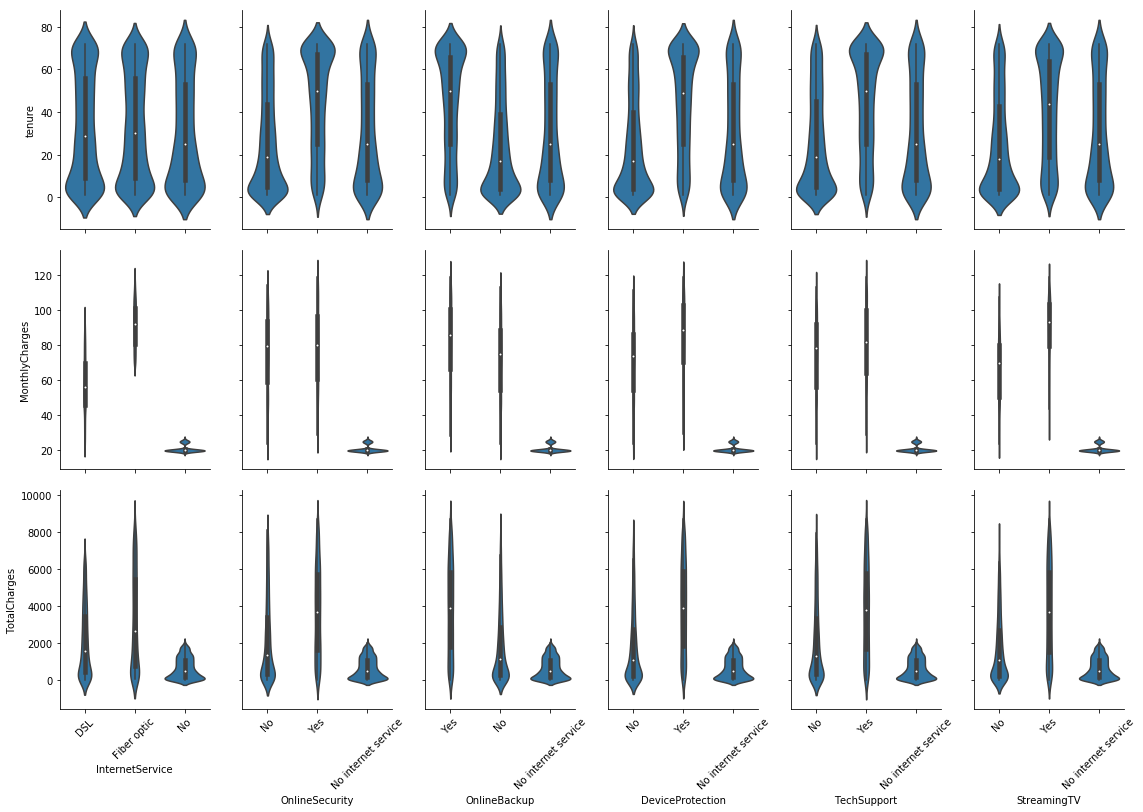

In [17]:
numCatGrd = sns.PairGrid(dataset, x_vars=catData.columns[6:12].values, y_vars=numData.columns[0:3].values,
                         aspect=.75, height=3.5)
for ax in numCatGrd.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
numCatGrd.map(sns.violinplot)

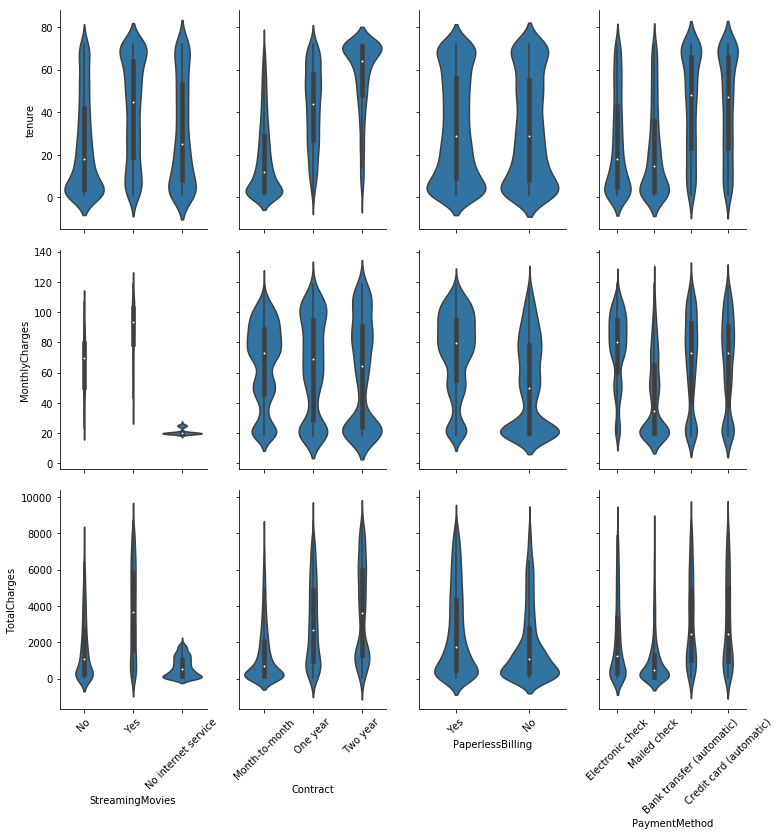

In [18]:
numCatGrd = sns.PairGrid(dataset, x_vars=catData.columns[12:16].values,
                         y_vars=numData.columns[0:3].values, aspect=.75, height=3.5)
for ax in numCatGrd.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
numCatGrd.map(sns.violinplot)

#### 3.2.3 Categorical Data Analysis
<a id="3.2.3"></a>

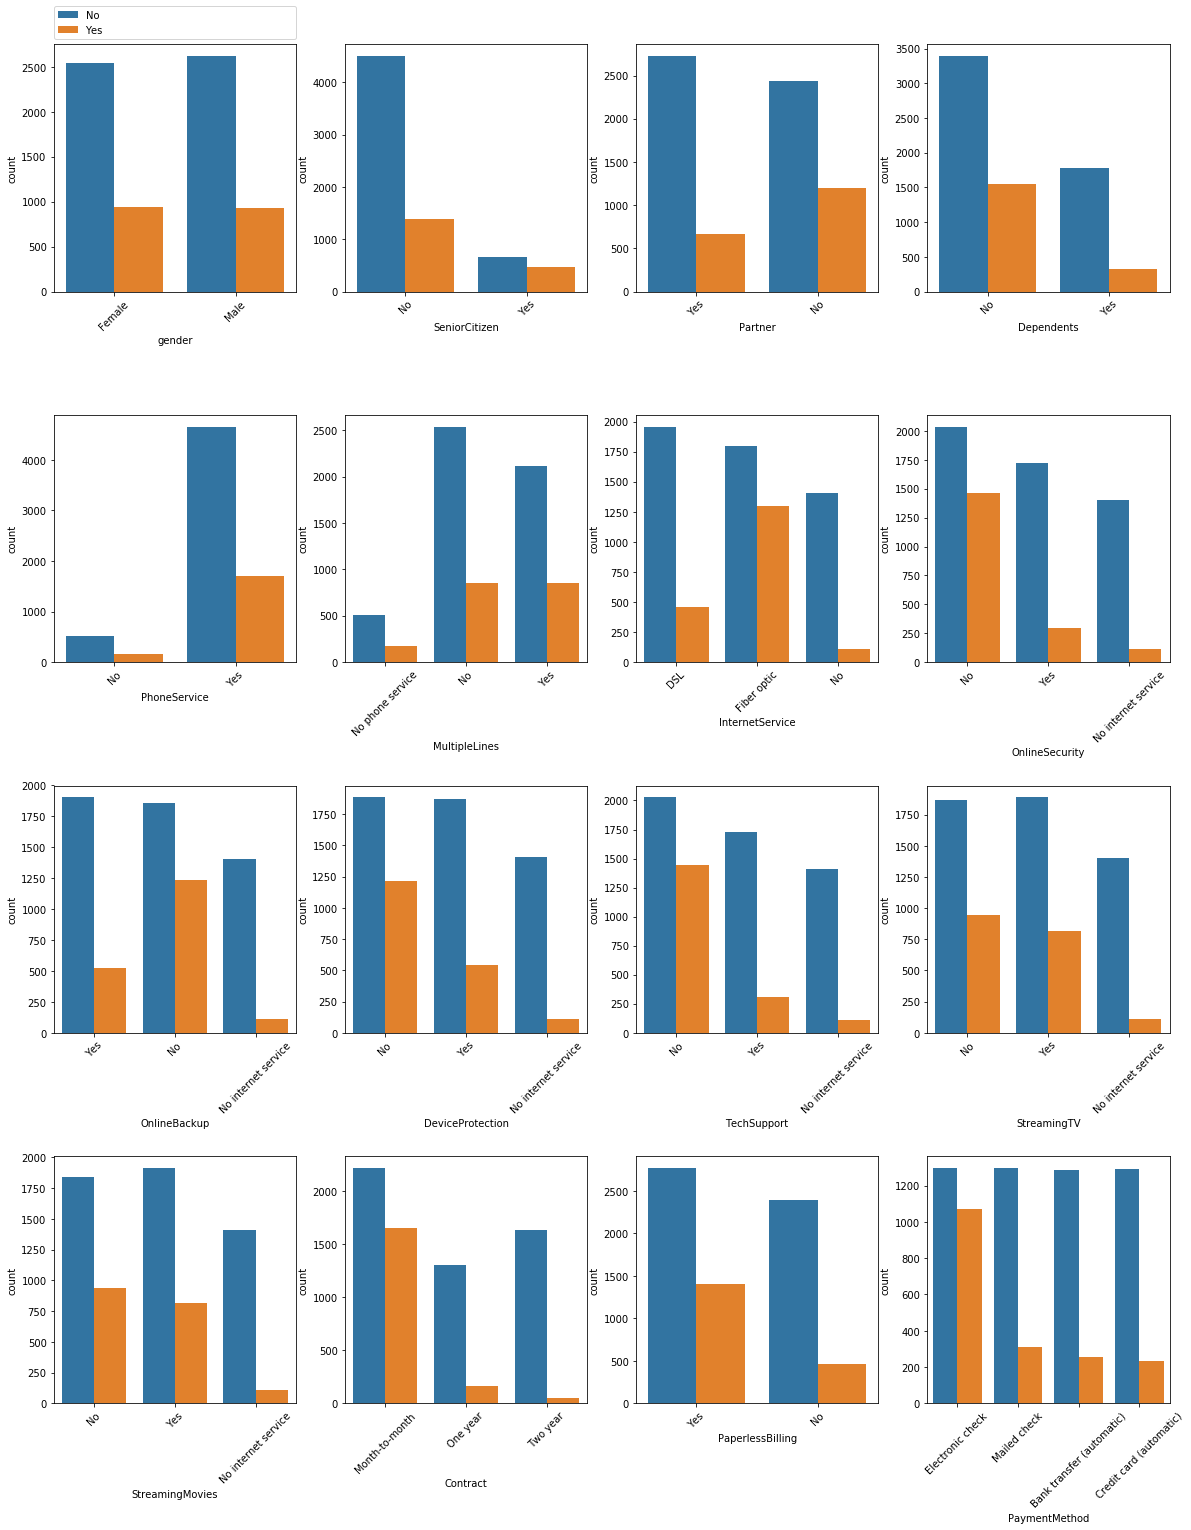

In [19]:
#Count plot:-
fig, ax = plt.subplots(4, 4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)
for i in range(0,16):
    numCatGrd = sns.countplot(x=catData.iloc[:,i], hue=catData["Churn"], ax=ax[divmod(i,4)])
    numCatGrd.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand",
                     borderaxespad=0.) if i==0 else numCatGrd.legend_.remove()
    for tick in ax[divmod(i,4)].get_xticklabels():
        tick.set_rotation(45)

## 4. Machine Learning
<a id="4"></a>

### 4.1 Preprocessing Data
<a id="4.1"></a>

In [20]:
# One-Hot encoding:
Data = pd.get_dummies(dataset, drop_first=True)
Data.info()
display(Data.head().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
SeniorCitizen_Yes                        7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

,0,1,2,3,4
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
gender_Male,0.00,1.00,1.00,1.00,0.00
SeniorCitizen_Yes,0.00,0.00,0.00,0.00,0.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00
Dependents_Yes,0.00,0.00,0.00,0.00,0.00
PhoneService_Yes,0.00,1.00,1.00,0.00,1.00
MultipleLines_No phone service,1.00,0.00,0.00,1.00,0.00
MultipleLines_Yes,0.00,0.00,0.00,0.00,0.00


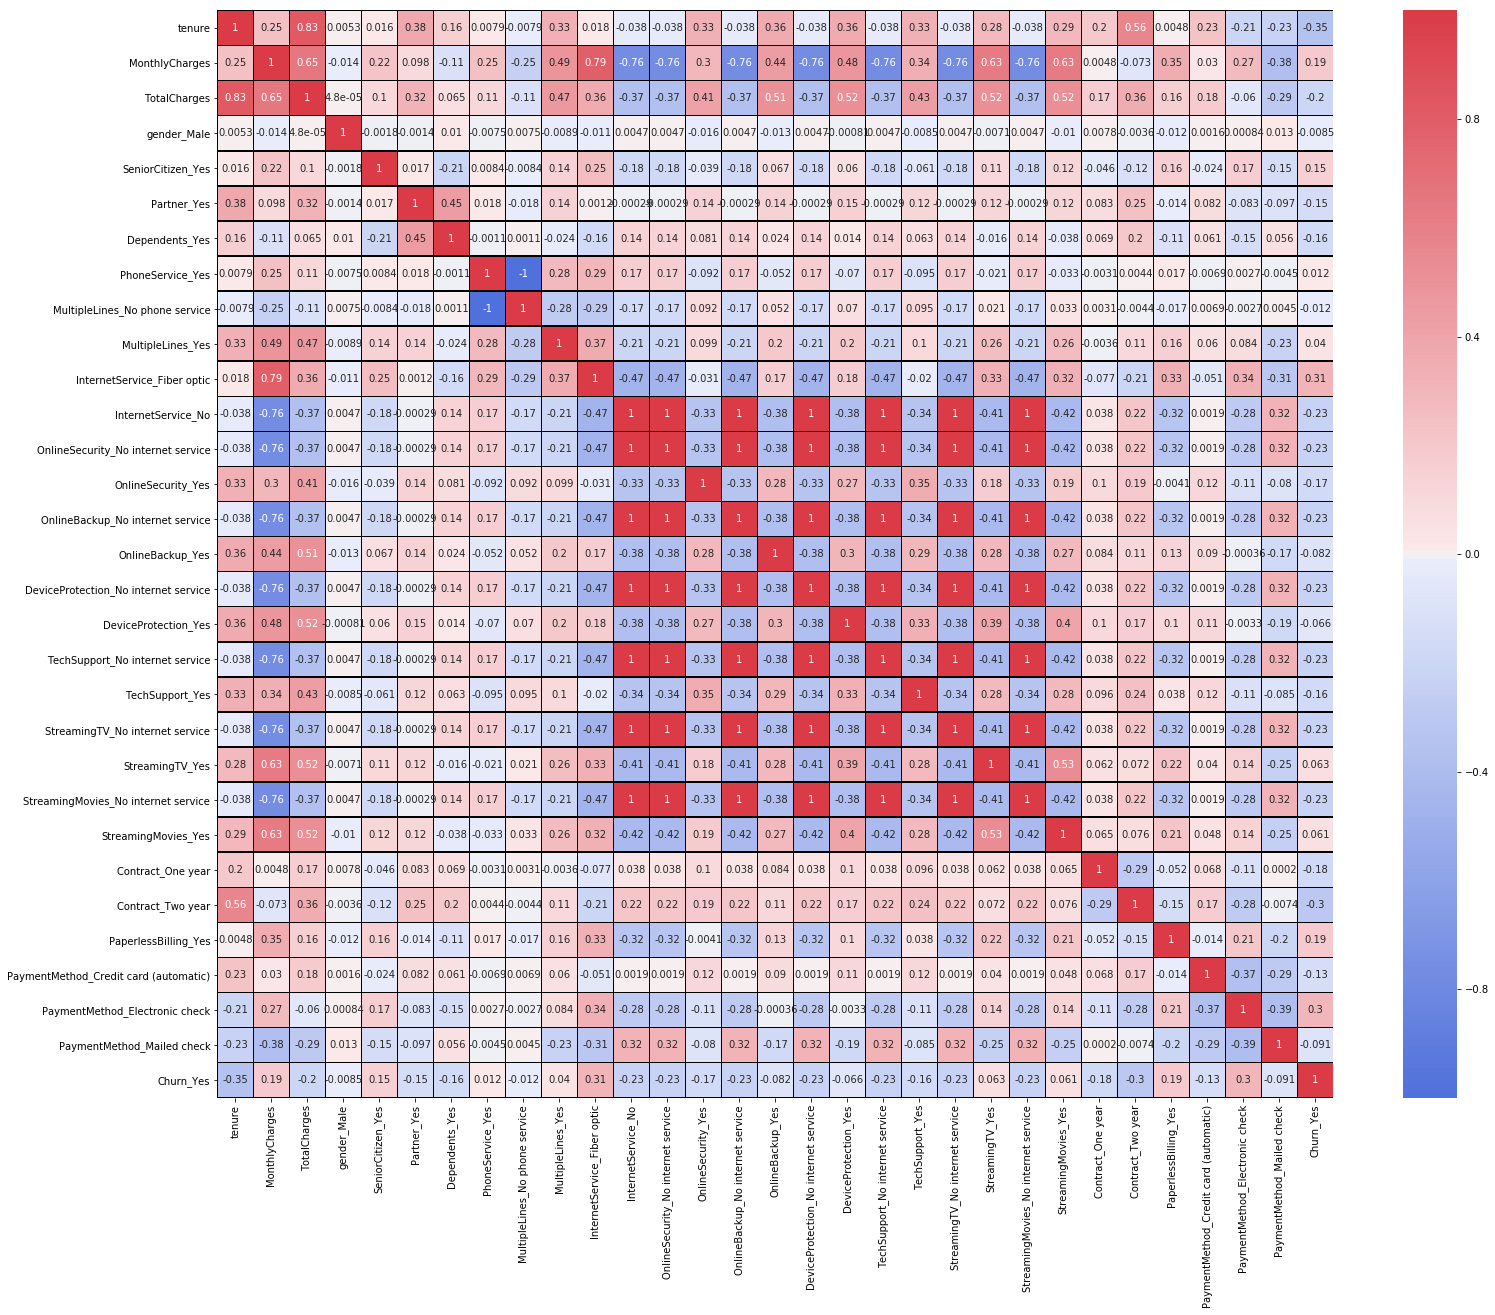

In [21]:
# Correlation matrix:
corr = Data.corr()

# Visulization of correlation matrix as Heat Map:
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True), annot=True,
            linewidths=0.5, linecolor='black', square=False, ax=ax)

In [22]:
# Removing features with 100% correlation and separating input and output features into X and Y:
X = Data.drop(['Churn_Yes', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service',
               'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
               'TechSupport_No internet service', 'StreamingTV_No internet service',
               'StreamingMovies_No internet service'], axis=1)

Y = Data['Churn_Yes'].values

# Storing names of X's features:
xFeatures = X.columns

In [23]:
# Scale numerical features('tenure', 'MonthlyCharges' & 'TotalCharges') of X to zero mean and unit variance:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = np.concatenate((scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']].values),
                    X.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1).values), axis=1)

### 4.2 Divide Dataset into Training, Cross-Validation and Testing Data
<a id="4.2"></a>

#### 4.2.1 Holdout Method with Random Sampling
<a id="4.2.1"></a>

In [24]:
X_trainHold, X_testHold, Y_trainHold, Y_testHold = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                    random_state=RANDOM_SEED)

X_trainHold, X_valHold, Y_trainHold, Y_valHold = train_test_split(X_trainHold, Y_trainHold,
                                                                  test_size=VAL_RATIO, random_state=RANDOM_SEED)

#### 4.2.2 Stratified Holdout Method
<a id="4.2.2"></a>

In [25]:
X_trainStrat, X_testStrat, Y_trainStrat, Y_testStrat = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                        random_state=RANDOM_SEED, stratify=Y)

X_trainStrat, X_valStrat, Y_trainStrat, Y_valStrat = train_test_split(X_trainStrat, Y_trainStrat,
                                                                      test_size=VAL_RATIO, random_state=RANDOM_SEED,
                                                                      stratify=Y_trainStrat)

#### 4.2.3 Stratified K-Folds Cross-Validation
<a id="4.2.3"></a>

In [26]:
X_trainKFold, X_testKFold, Y_trainKFold, Y_testKFold = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                        random_state=RANDOM_SEED, stratify=Y)

skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_SEED)
X_cvKFold, Y_cvKFold = list(), list()

for train_index, cv_index in skf.split(X_trainKFold, Y_trainKFold):
    X_cvKFold.append((X[train_index], X[cv_index]))
    Y_cvKFold.append((Y[train_index], Y[cv_index]))

#### 4.2.4 Bootstrapping
<a id="4.2.4"></a>

In [27]:
for train_index, test_index in ShuffleSplit(n_splits=1, test_size=TEST_RATIO, random_state=RANDOM_SEED).split(X, Y):
    X_trainBStrap, X_testBStrap = X[train_index], X[test_index]
    Y_trainBStrap, Y_testBStrap = Y[train_index], Y[test_index]

for train_index, test_index in ShuffleSplit(n_splits=1, test_size=VAL_RATIO,
                                            random_state=RANDOM_SEED).split(X_trainBStrap, Y_trainBStrap):
    X_trainBStrap, X_valBStrap = X[train_index], X[test_index]
    Y_trainBStrap, Y_valBStrap = Y[train_index], Y[test_index]

### 4.3 Model Selection using Stratified K-Fold Cross-Validation
<a id="4.3"></a>

In [28]:
scoring = 'roc_auc'

models = [
    ("Linear Model", SGDClassifier(loss='squared_hinge', penalty='elasticnet', alpha=1e-3, l1_ratio=0, max_iter=300,
                                   tol=None, epsilon=1e-4, n_jobs=-1, random_state=RANDOM_SEED,
                                   learning_rate='constant', eta0=1e-3, warm_start=False)),

    ("KNN", KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto', p=1, metric='minkowski',
                                 n_jobs=-1)),

    ("Gaussian NB", GaussianNB()),

    ("SVC(RBF)", SVC(C=1, kernel='rbf', gamma=0.01, tol=1e-4, max_iter=-1, random_state=RANDOM_SEED)),

    ("Neural Network", MLPClassifier(hidden_layer_sizes=(10,5), alpha=1, learning_rate_init=0.01, max_iter=100,
                                     shuffle=True, random_state=RANDOM_SEED, tol=1e-6, verbose=False,
                                     warm_start=False)),

    ("Random Forest", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4,
                                             max_features='auto', min_impurity_decrease=0.0, n_jobs=-1,
                                             random_state=RANDOM_SEED,)),

    ("Ada Boost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, max_features='auto',
                                                                           min_impurity_decrease=0.0,
                                                                           random_state=RANDOM_SEED, presort=True),
                                     n_estimators=300, learning_rate=1e-3, random_state=RANDOM_SEED)),

    ("LDA", LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', n_components=5)),
    ("QDA", QuadraticDiscriminantAnalysis(reg_param=0.5, tol=1e-4))
]

In [29]:
results = dict()
for name, model in models:
    cv_results = cross_validate(model, X_trainKFold, Y_trainKFold, scoring=scoring,
                                cv=skf.split(X_trainKFold, Y_trainKFold), n_jobs=-1, return_train_score=True)
    results[name] = cv_results
    print("\nFor {}:-".format(name))
    for result in cv_results:
        print("\t{}: {}".format(result, np.mean(cv_results[result])))

results = pd.DataFrame(results)


For Linear Model:-
	fit_time: 0.7760298490524292
	score_time: 0.013176250457763671
	test_score: 0.8422136871584034
	train_score: 0.8462053812409213

For KNN:-
	fit_time: 0.014348864555358887
	score_time: 0.314335036277771
	test_score: 0.8392542968728842
	train_score: 0.846393256438367

For Gaussian NB:-
	fit_time: 0.006987380981445313
	score_time: 0.0031188488006591796
	test_score: 0.8317357849748932
	train_score: 0.8333019665339993

For SVC(RBF):-
	fit_time: 1.7895025730133056
	score_time: 0.13213694095611572
	test_score: 0.8389997399938249
	train_score: 0.8425602432415307

For Neural Network:-
	fit_time: 0.6551817178726196
	score_time: 0.0024010419845581056
	test_score: 0.8470141161685925
	train_score: 0.8518501222314967

For Random Forest:-
	fit_time: 0.6827977418899536
	score_time: 0.10695209503173828
	test_score: 0.8461378249400091
	train_score: 0.8557795117022954

For Ada Boost:-
	fit_time: 5.627173352241516
	score_time: 0.11336469650268555
	test_score: 0.8471053025009343
	train

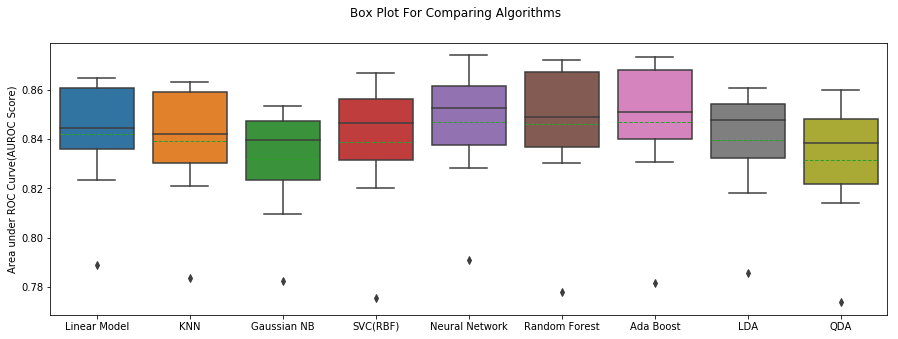

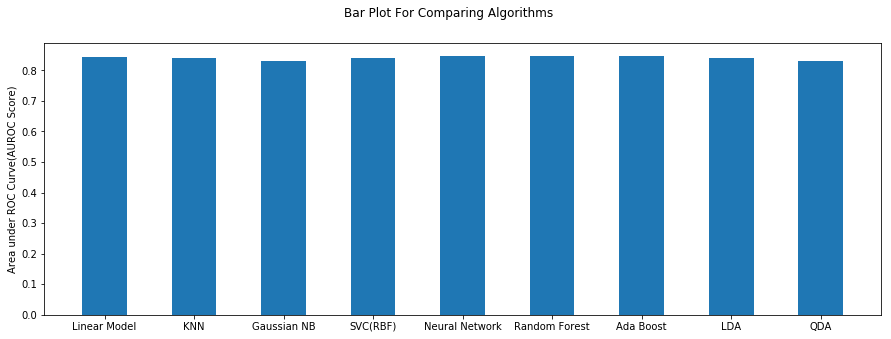

In [30]:
#Compare Algorithms
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle("Box Plot For Comparing Algorithms")
plt.ylabel("Area under ROC Curve(AUROC Score)")
sns.boxplot(y=list(results.iloc[2]), x=list(results.columns), ax=ax, showmeans=True, meanline=True)
plt.plot()
plt.savefig('error_graph_Box_Plot.png')

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle("Bar Plot For Comparing Algorithms")
plt.ylabel("Area under ROC Curve(AUROC Score)")
plt.bar(x=list(results.columns), height=np.mean(list(results.iloc[2]), axis=1), width=0.5)
plt.plot()
plt.savefig('error_graph_Bar_Plot.png')

###### We observe from above graph that Linear Model, Neural Network, and Random Forest have almost equal score, but since Linear Model is simplest so we select it.

Stats on Test Data for Linear Model :-

Area under ROC Curve(AUROC Score) of Linear Model on Test Data: 0.7371875177951142

Confusion Matrix :-
 [[885 148]
 [143 231]]

Classification Report:-
              precision    recall  f1-score   support

          0       0.86      0.86      0.86      1033
          1       0.61      0.62      0.61       374

avg / total       0.79      0.79      0.79      1407



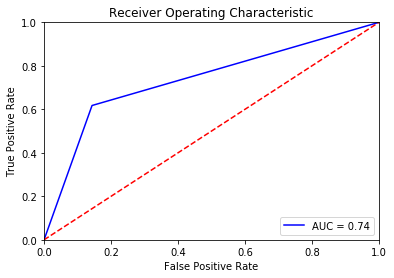

In [31]:
# Predictions on Test Data:

modelName, modelSelected = models[0]
print("Stats on Test Data for", modelName, ":-\n")
modelSelected.fit(X_trainKFold, Y_trainKFold)
predictions = modelSelected.predict(X_testKFold)
print("Area under ROC Curve(AUROC Score) of {} on Test Data: {}\n".format(modelName,
                                                                          roc_auc_score(Y_testKFold, predictions)))
print("Confusion Matrix :-\n", confusion_matrix(Y_testKFold, predictions))
print("\nClassification Report:-\n", classification_report(Y_testKFold, predictions))

fpr, tpr, threshold = roc_curve(Y_testKFold, predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4.4 Feature Selection
<a id="4.4"></a>

#### 4.4.1 Ranking Features on the basis of Model Coefficients
<a id="4.4.1"></a>

In [32]:
coefs = np.std(X_trainKFold, 0)*np.abs(modelSelected.coef_)
feature_imp = pd.DataFrame(coefs).T
feature_imp.columns=["Importance"]
feature_imp["Features"] = xFeatures
feature_imp.sort_values("Importance", inplace=True, ascending=False)
display(feature_imp)

,Importance,Features
0,0.300832,tenure
9,0.219233,InternetService_Fiber optic
10,0.141032,InternetService_No
18,0.105533,Contract_Two year
17,0.084359,Contract_One year
21,0.077791,PaymentMethod_Electronic check
15,0.070789,StreamingTV_Yes
16,0.064894,StreamingMovies_Yes
8,0.062662,MultipleLines_Yes
19,0.057549,PaperlessBilling_Yes


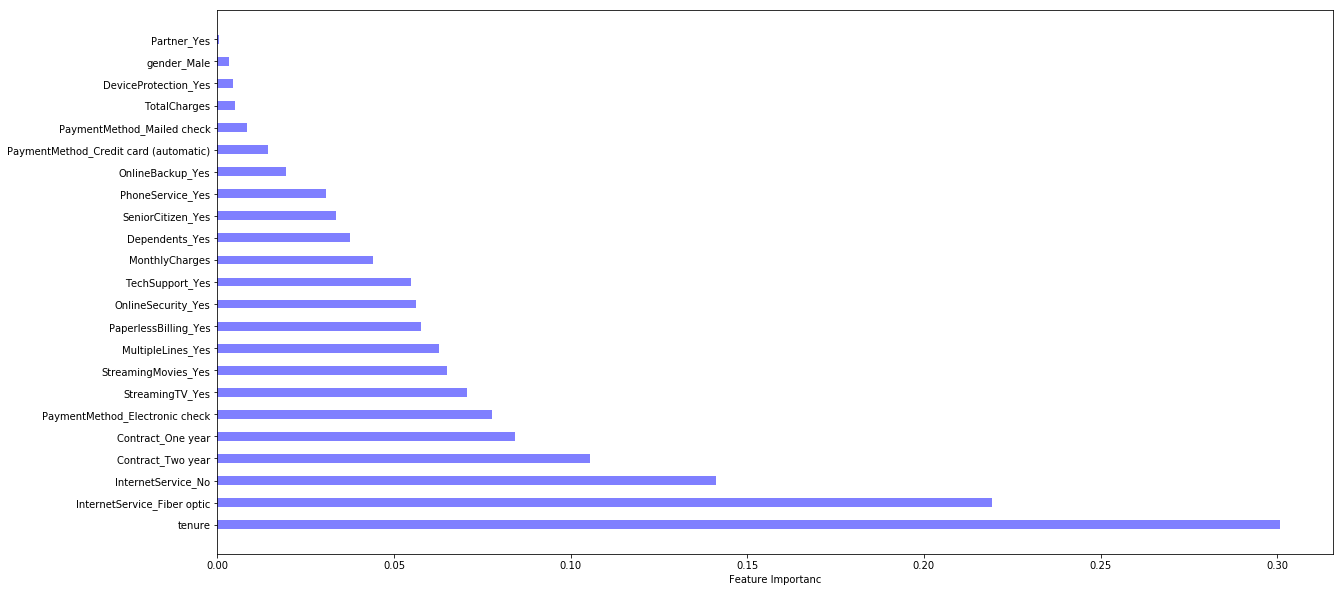

In [33]:
index = np.arange(len(feature_imp))
fig = plt.figure(figsize=(20,10))
rects = plt.barh(y=feature_imp["Features"] , width=feature_imp["Importance"],
                 height=0.4, alpha=0.5, color='b', label='Main')
plt.xlabel("Feature Importanc")
plt.show()

- From above we can observe that "tenure", "InternetService_Fiber optics", "InternetService_No", "MonthlyCharges" and "Contract_Two year" are most important features

#### 4.4.2 Recursive Feature Elimination (RFE) using Stratified K-Fold Cross-Validation
<a id="4.4.2"></a>

In [34]:
rfecv = RFECV(estimator=modelSelected, step=1, cv=skf.split(X_trainKFold, Y_trainKFold), scoring=scoring,
              verbose=0, n_jobs=-1)
rfecv.fit(X_trainKFold, Y_trainKFold)

print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 17


In [35]:
print("Feature Ranking(all selected features are ranked 1): ", rfecv.ranking_)
print("\nName of Selected Features:-\n", xFeatures[rfecv.support_])

Feature Ranking(all selected features are ranked 1):  [1 3 6 5 1 7 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 2]

Name of Selected Features:-
 Index(['tenure', 'SeniorCitizen_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')


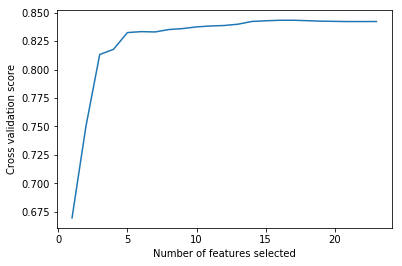

In [36]:
# Plot number of features VS. cross-validation scores:
fig, ax = plt.subplots()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Stats on Test Data after selecting optimal number of features for Linear Model :-

Area under ROC Curve(AUROC Score) of Linear Model on Test Data: 0.740230158771244

Confusion Matrix :-
 [[883 150]
 [140 234]]

Classification Report:-
              precision    recall  f1-score   support

          0       0.86      0.85      0.86      1033
          1       0.61      0.63      0.62       374

avg / total       0.80      0.79      0.79      1407



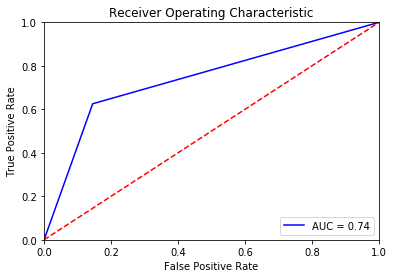

In [37]:
# Selecting features according to RFE:
X_trainRFE, X_testRFE = X_trainKFold[:, rfecv.support_], X_testKFold[:, rfecv.support_]

# Predictions on Test Data:
print("Stats on Test Data after selecting optimal number of features for", modelName, ":-\n")
modelSelected.fit(X_trainRFE, Y_trainKFold)
predictions = modelSelected.predict(X_testRFE)
print("Area under ROC Curve(AUROC Score) of {} on Test Data: {}\n".format(modelName,
                                                                          roc_auc_score(Y_testKFold, predictions)))
print("Confusion Matrix :-\n", confusion_matrix(Y_testKFold, predictions))
print("\nClassification Report:-\n", classification_report(Y_testKFold, predictions))

fpr, tpr, threshold = roc_curve(Y_testKFold, predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4.5 Hyperparameter Tuning using Grid Search
<a id="4.5"></a>

In [38]:
gscv = GridSearchCV(estimator=modelSelected,
                    param_grid={'loss':['hinge', 'log', 'modified_huber', 'squared_hinge'],
                                'alpha':np.linspace(1e-3, 1, 5), 'l1_ratio':np.linspace(0, 1, 10)}, scoring=scoring,
                    n_jobs=-1, cv=skf.split(X_trainRFE, Y_trainKFold), verbose=0, return_train_score=True)

gscv.fit(X_trainRFE, Y_trainKFold)

print("Tuned hyperparameters:-\n", gscv.best_params_)
print("\nBest test score:", gscv.best_score_)
modelSelected = gscv.best_estimator_

Tuned hyperparameters:-
 {'alpha': 0.001, 'l1_ratio': 0.8888888888888888, 'loss': 'log'}

Best test score: 0.8457487677717531


## 5. Final Model
<a id="5"></a>


Stats on Test Data for final model: SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.0001,
       eta0=0.001, fit_intercept=True, l1_ratio=0.8888888888888888,
       learning_rate='constant', loss='log', max_iter=300, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False) :-

Area under ROC Curve(AUROC Score) of Linear Model on Test Data: 0.7263072614419349

Confusion Matrix :-
 [[915 118]
 [162 212]]

Classification Report:-
              precision    recall  f1-score   support

          0       0.85      0.89      0.87      1033
          1       0.64      0.57      0.60       374

avg / total       0.79      0.80      0.80      1407



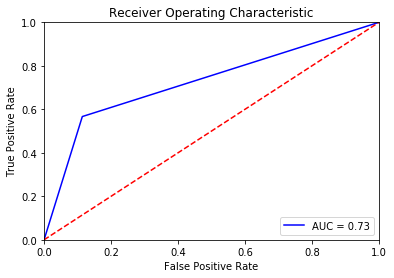

In [39]:
# Final model predictions on Test Data:
print("\nStats on Test Data for final model:-\n\n\t", modelSelected)

predictions = gscv.predict(X_testRFE)
print("\nArea under ROC Curve(AUROC Score) of {} on Test Data: {}\n".format(modelName,
                                                                          roc_auc_score(Y_testKFold, predictions)))
print("Confusion Matrix :-\n", confusion_matrix(Y_testKFold, predictions))
print("\nClassification Report:-\n", classification_report(Y_testKFold, predictions))

fpr, tpr, threshold = roc_curve(Y_testKFold, predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()